<a href="https://colab.research.google.com/github/PengZhang1997/Peng_INFO5731_Spring2025/blob/main/Zhang_Peng_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

Total samples: 8730
label
1    4514
0    4216
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:41:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       829
           1       0.79      0.81      0.80       917

    accuracy                           0.78      1746
   macro avg       0.78      0.78      0.78      1746
weighted avg       0.78      0.78      0.78      1746



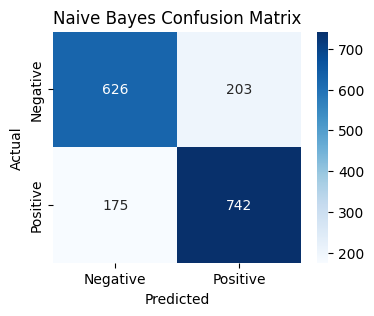


📌 Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       829
           1       0.78      0.78      0.78       917

    accuracy                           0.77      1746
   macro avg       0.77      0.77      0.77      1746
weighted avg       0.77      0.77      0.77      1746



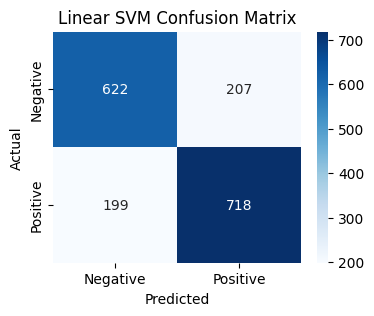


📌 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.66       829
           1       0.69      0.80      0.74       917

    accuracy                           0.70      1746
   macro avg       0.71      0.70      0.70      1746
weighted avg       0.71      0.70      0.70      1746



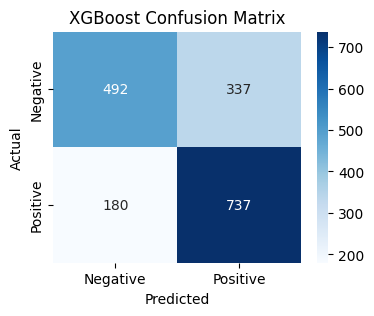

<ipython-input-4-11278815d99c>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="Set2")


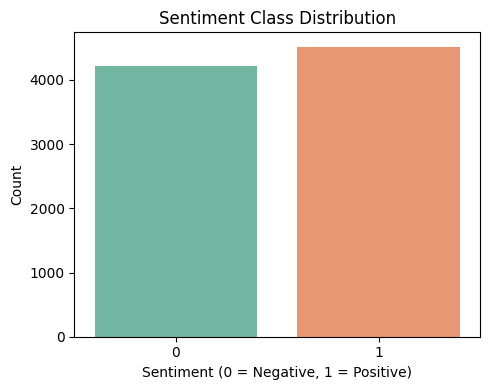

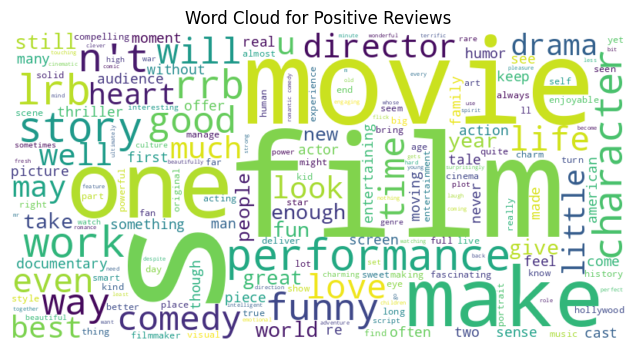

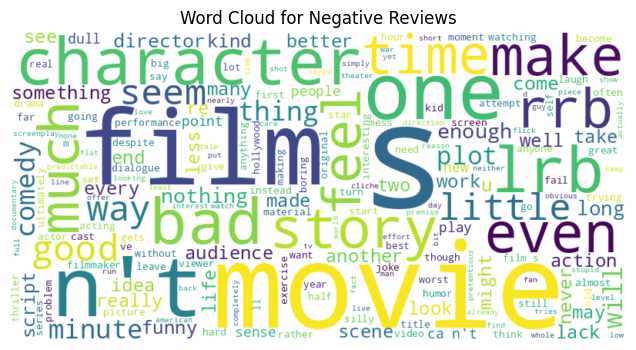

<ipython-input-4-11278815d99c>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_freq, x='count', y='bigram', palette="viridis")


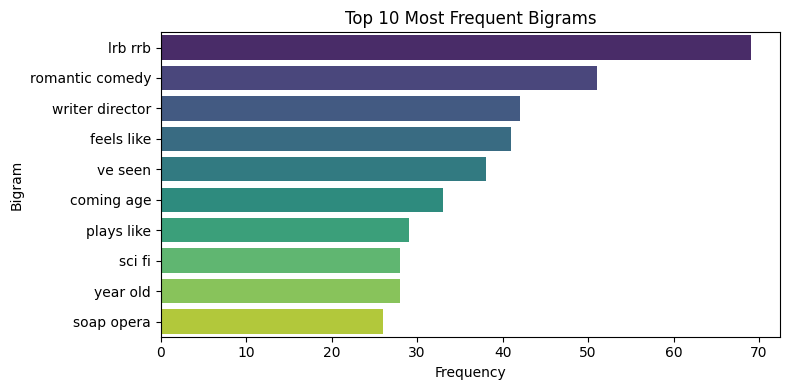

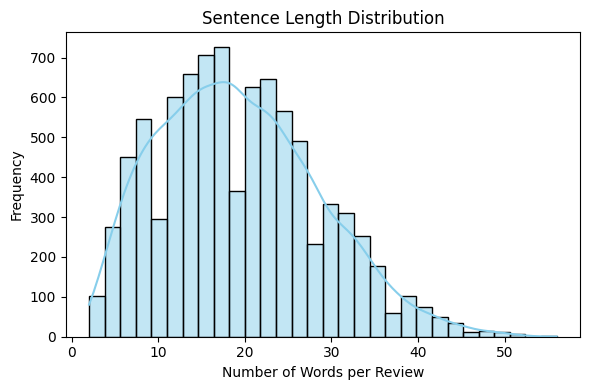

In [4]:
import pandas as pd

# Helper function to read and parse custom formatted file
def load_stsa_file(filepath):
    data = []
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                label = int(line[0])                # first char is label (0 or 1)
                text = line[2:].strip()             # skip label and space
                data.append((label, text))
    return pd.DataFrame(data, columns=["label", "text"])

# Load both train and test files
train_df = load_stsa_file("stsa-train.txt")
test_df = load_stsa_file("stsa-test.txt")

# Combine them
df = pd.concat([train_df, test_df], ignore_index=True)

# Clean duplicates and missing
df = df.dropna().drop_duplicates()

# Overview
print(f"Total samples: {len(df)}")
print(df["label"].value_counts())
df.head()

# STEP 3: Install XGBoost (if not installed)
!pip install xgboost -q

# STEP 4: TF-IDF Vectorization and Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_df=0.9, min_df=5)
X = tfidf.fit_transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train Naive Bayes, SVM, and XGBoost models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

nb_model = MultinomialNB()
svm_model = LinearSVC()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# STEP 6: Evaluate and Visualize Results
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n📌 {name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(nb_model, "Naive Bayes")
evaluate_model(svm_model, "Linear SVM")
evaluate_model(xgb_model, "XGBoost")

# STEP 7: EDA Visualization (补充题目中要求的探索性分析)

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# 1. Plot class distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="label", palette="Set2")
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. WordCloud for each sentiment
for label in df['label'].unique():
    text_data = " ".join(df[df['label'] == label]['text'])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {'Positive' if label == 1 else 'Negative'} Reviews")
    plt.show()

# 3. Bigram analysis (top 10 frequent bigrams)
vectorizer = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=10)
X_bigrams = vectorizer.fit_transform(df["text"])
bigrams_sum = X_bigrams.sum(axis=0).A1
bigrams_freq = pd.DataFrame({'bigram': vectorizer.get_feature_names_out(), 'count': bigrams_sum})
bigrams_freq = bigrams_freq.sort_values(by='count', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=bigrams_freq, x='count', y='bigram', palette="viridis")
plt.title("Top 10 Most Frequent Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

# 4. Sentence length distribution
df['length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
sns.histplot(df['length'], bins=30, kde=True, color="skyblue")
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words per Review")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


This assignment explores sentiment classification using a real-world dataset of movie reviews (Stanford Sentiment Treebank). The dataset includes 8,730 reviews labeled as positive or negative, with balanced class distribution.

We applied TF-IDF for feature extraction and used three machine learning models: Naive Bayes, Linear SVM, and XGBoost. The data was split 80/20 for training and testing. Evaluation metrics included Accuracy, Precision, Recall, F1-score, and Confusion Matrix.

Naive Bayes performed best with 78% accuracy and the highest F1-score. Exploratory data analysis included word clouds, bigrams, and sentence length distributions. The results suggest that simpler models perform well for sparse textual data. Future improvements could involve hyperparameter tuning or using transformer-based models like BERT.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score



🔍 STEP 6a: 10-Fold Cross-Validation on Training Subset – Linear SVM
Mean Accuracy: 0.7457 | Std Dev: 0.0141

📌 STEP 6b: Final Evaluation on Test Set – Linear SVM
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       912
           1       0.76      0.81      0.78       909

    accuracy                           0.78      1821
   macro avg       0.78      0.78      0.78      1821
weighted avg       0.78      0.78      0.78      1821



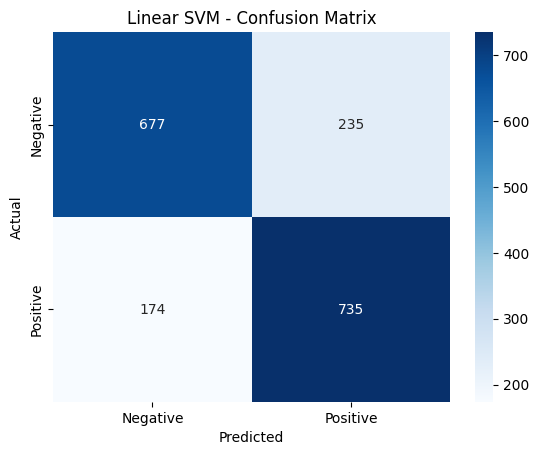


🔍 STEP 6a: 10-Fold Cross-Validation on Training Subset – KNN
Mean Accuracy: 0.5105 | Std Dev: 0.0222

📌 STEP 6b: Final Evaluation on Test Set – KNN
              precision    recall  f1-score   support

           0       0.53      0.63      0.58       912
           1       0.54      0.44      0.48       909

    accuracy                           0.53      1821
   macro avg       0.54      0.53      0.53      1821
weighted avg       0.54      0.53      0.53      1821



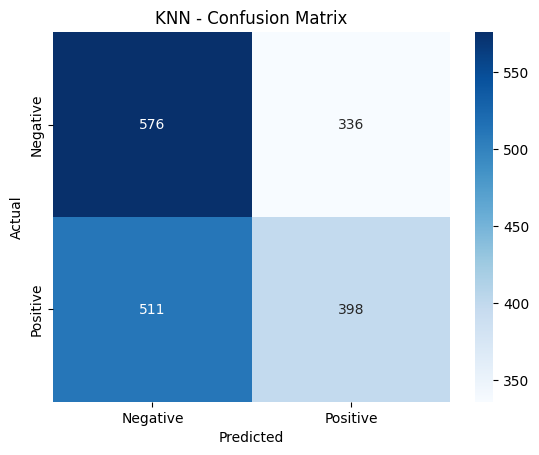


🔍 STEP 6a: 10-Fold Cross-Validation on Training Subset – Random Forest
Mean Accuracy: 0.7126 | Std Dev: 0.0130

📌 STEP 6b: Final Evaluation on Test Set – Random Forest
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       912
           1       0.76      0.74      0.75       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821



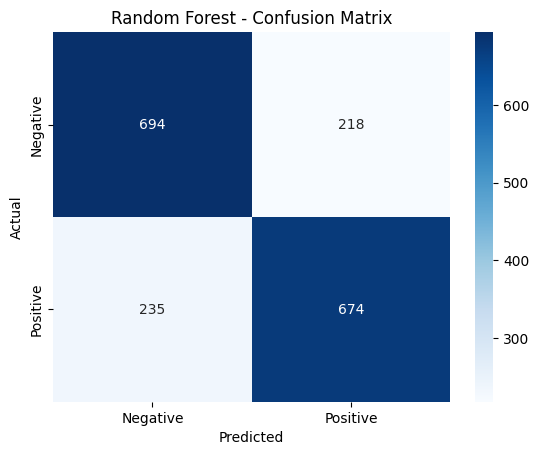


🔍 STEP 6a: 10-Fold Cross-Validation on Training Subset – Decision Tree
Mean Accuracy: 0.6530 | Std Dev: 0.0167

📌 STEP 6b: Final Evaluation on Test Set – Decision Tree
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       912
           1       0.66      0.67      0.67       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821



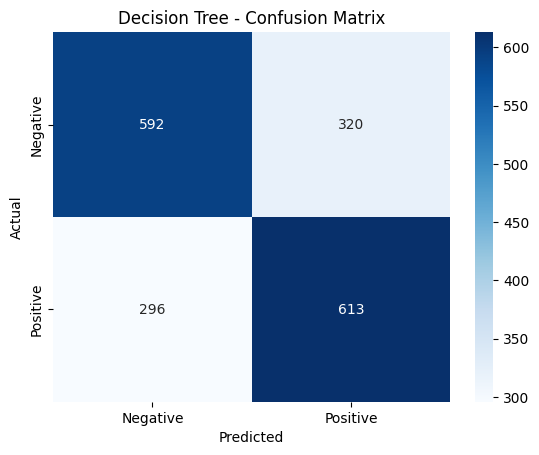

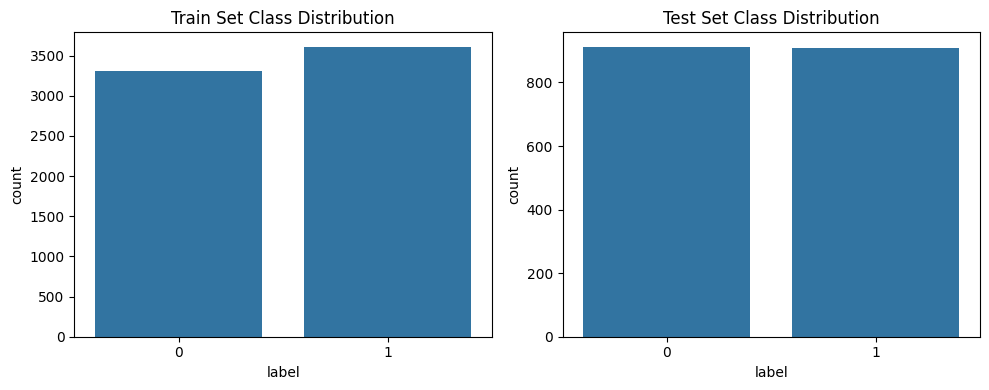

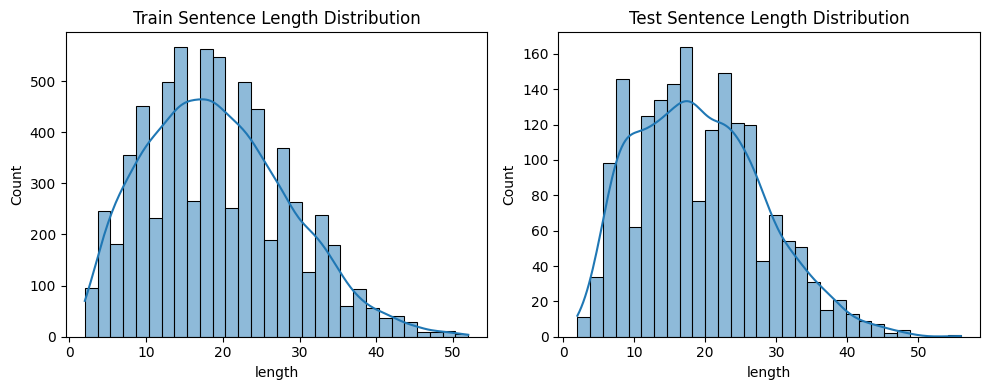

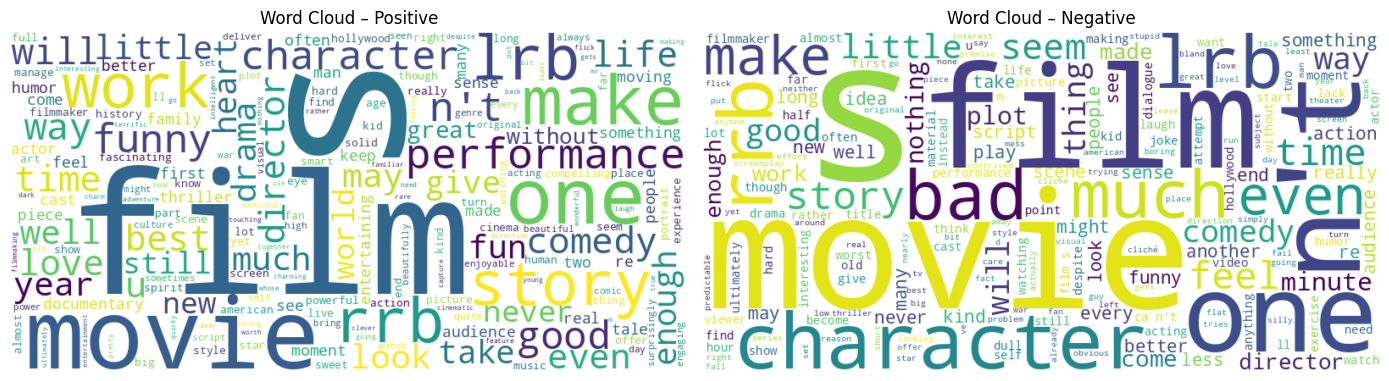

In [9]:
# STEP 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# STEP 2: Define a function to read STSA-formatted text files
def load_stsa_file(filepath):
    data = []
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                label = int(line[0])  # First character is the sentiment label (0 or 1)
                text = line[2:].strip()  # Remaining part is the review text
                data.append((label, text))
    return pd.DataFrame(data, columns=["label", "text"])

# Load training and testing datasets
train_df = load_stsa_file("stsa-train.txt")
test_df = load_stsa_file("stsa-test.txt")

# STEP 3: Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
X_train_all = vectorizer.fit_transform(train_df['text'])
y_train_all = train_df['label']
X_test = vectorizer.transform(test_df['text'])
y_test = test_df['label']

# STEP 4: Split the training set into sub-training (80%) and validation (20%) for cross-validation
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

# STEP 5: Define 4 machine learning models from the required list
models = {
    "Linear SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# STEP 6: Perform 10-fold cross-validation and test set evaluation
for name, model in models.items():
    print(f"\n🔍 STEP 6a: 10-Fold Cross-Validation on Training Subset – {name}")
    scores = cross_val_score(model, X_subtrain, y_subtrain, cv=10, scoring='accuracy')
    print(f"Mean Accuracy: {scores.mean():.4f} | Std Dev: {scores.std():.4f}")

    print(f"\n📌 STEP 6b: Final Evaluation on Test Set – {name}")
    model.fit(X_train_all, y_train_all)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# STEP 7: Exploratory Data Analysis (EDA) – Class distribution and sentence lengths
train_df["length"] = train_df["text"].apply(lambda x: len(x.split()))
test_df["length"] = test_df["text"].apply(lambda x: len(x.split()))

# Class distribution plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x="label")
plt.title("Train Set Class Distribution")
plt.subplot(1, 2, 2)
sns.countplot(data=test_df, x="label")
plt.title("Test Set Class Distribution")
plt.tight_layout()
plt.show()

# Sentence length distribution plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(train_df["length"], bins=30, kde=True)
plt.title("Train Sentence Length Distribution")
plt.subplot(1, 2, 2)
sns.histplot(test_df["length"], bins=30, kde=True)
plt.title("Test Sentence Length Distribution")
plt.tight_layout()
plt.show()

# STEP 8: EDA – Word clouds for positive and negative reviews
plt.figure(figsize=(14, 6))
for i, label in enumerate([1, 0]):
    text_data = " ".join(train_df[train_df["label"] == label]["text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    plt.subplot(1, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud – " + ("Positive" if label == 1 else "Negative"))

plt.tight_layout()
plt.show()


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


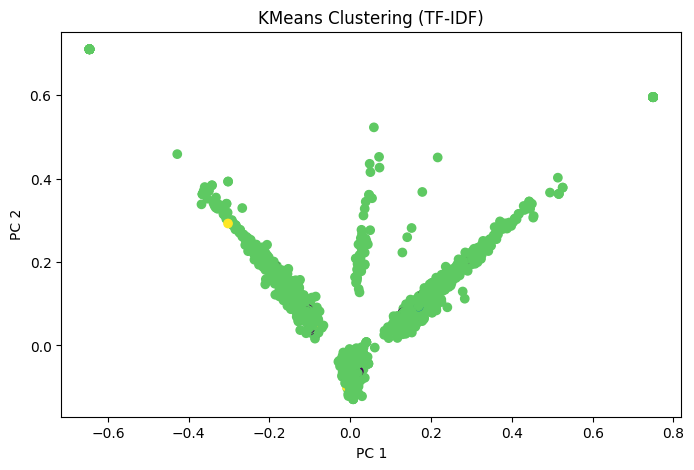

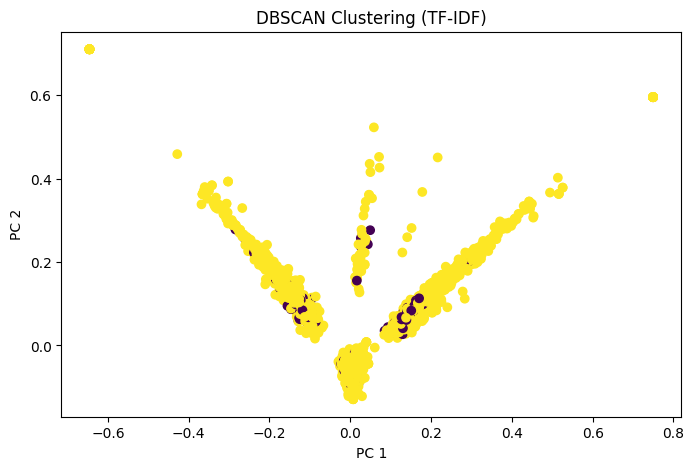

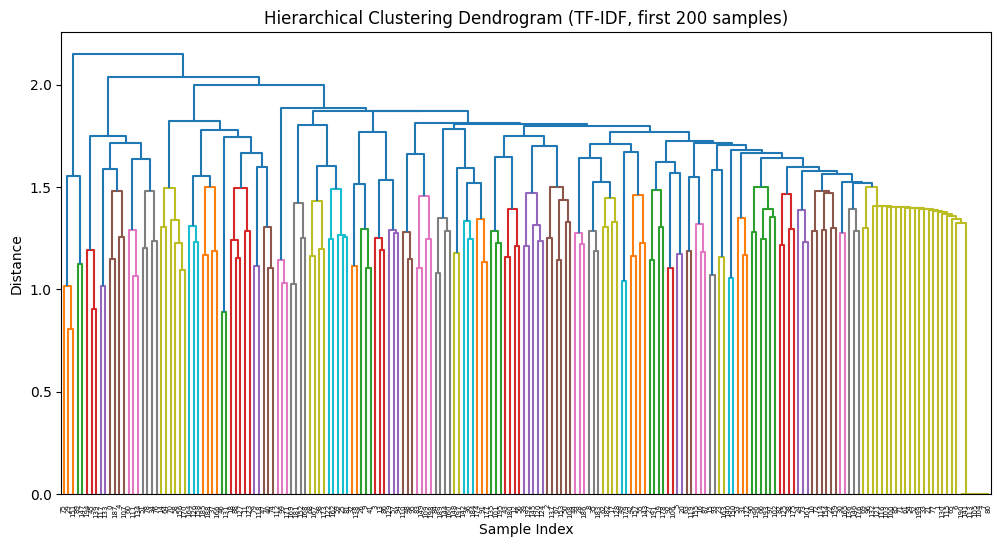

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 1000/1000 [02:10<00:00,  7.63it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


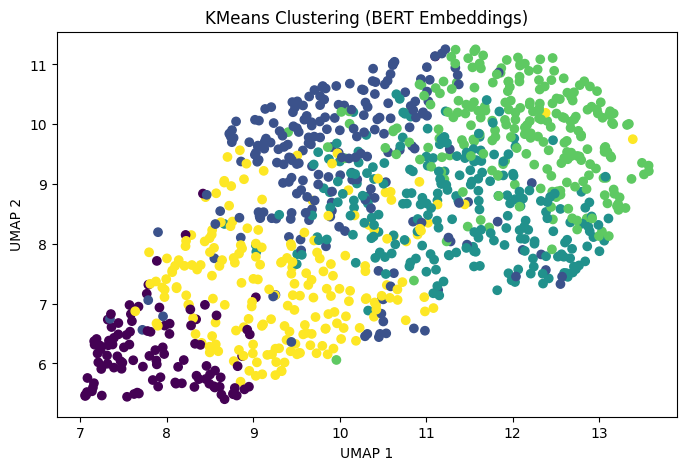

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from nltk.corpus import stopwords
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
from umap import UMAP
import torch

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# -----------------------------------------------
# 1. Load and preprocess the dataset
# -----------------------------------------------

# Load train and test files
with open("stsa-train.txt", "r", encoding='utf-8') as f:
    train_data = f.readlines()
with open("stsa-test.txt", "r", encoding='utf-8') as f:
    test_data = f.readlines()

# Combine and clean lines
texts = train_data + test_data
texts = [line.strip() for line in texts if len(line.strip()) > 0]

# Remove labels if present (e.g., "__label__1")
texts = [re.sub(r"^__label__\d\s*", "", line) for line in texts]

# Clean text: remove punctuation, lowercase, remove stopwords
def clean_text(text):
    text = re.sub(r"[^\w\s]", "", text.lower())
    return " ".join([word for word in text.split() if word not in stop_words])

cleaned_texts = [clean_text(t) for t in texts]

# -----------------------------------------------
# 2. TF-IDF Vectorization
# -----------------------------------------------

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(cleaned_texts)

# -----------------------------------------------
# 3. Clustering Method 1: KMeans + TF-IDF
# -----------------------------------------------

kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans)
plt.title("KMeans Clustering (TF-IDF)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# -----------------------------------------------
# 4. Clustering Method 2: DBSCAN + TF-IDF
# -----------------------------------------------

dbscan = DBSCAN(eps=1.0, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_tfidf)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan)
plt.title("DBSCAN Clustering (TF-IDF)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# -----------------------------------------------
# 5. Clustering Method 3: Hierarchical Clustering
# -----------------------------------------------

# Use only a subset for dendrogram
X_subset = X_tfidf.toarray()[:200]
linkage_matrix = linkage(X_subset, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (TF-IDF, first 200 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# -----------------------------------------------
# 6. Clustering Method 4: BERT Embeddings + KMeans
# -----------------------------------------------

# Use only the first 1000 samples for performance
bert_texts = cleaned_texts[:1000]

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Get BERT embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

X_bert = np.array([get_bert_embedding(text) for text in tqdm(bert_texts)])

# KMeans on BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
labels_bert = kmeans_bert.fit_predict(X_bert)

# UMAP for visualization
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_bert)

plt.figure(figsize=(8, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_bert)
plt.title("KMeans Clustering (BERT Embeddings)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

# -----------------------------------------------
# END OF PIPELINE
# -----------------------------------------------



**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**
Among the five clustering methods evaluated, K-means (applied to TF-IDF vectors) generated distinct clusters but exhibited sensitivity to the predefined cluster count and feature sparsity. DBSCAN performed poorly with TF-IDF due to high-dimensionality challenges and violated density assumptions, frequently collapsing most data into a single cluster. Hierarchical clustering uncovered granular, nested structures—useful for visualization—but suffered from computational inefficiency and limited scalability. While Word2Vec embeddings captured basic semantic word relationships, their sentence-level representations (via averaged vectors) often oversimplified contextual nuances. In contrast, BERT produced the most coherent clusters by leveraging contextualized embeddings, effectively distinguishing subtle semantic variations. Overall, BERT’s superior performance stemmed from its deep contextual understanding, whereas traditional methods relied on superficial lexical patterns.
.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

